<div>
  <p style = 'text-align:center;'>
  <img src="https://comunicacion.umh.es/files/2008/07/PRIMERA-ARTICULACION-COLOR-CMYK_ok.jpg" alt="Logo UMH" width="300px">
  </p>
</div>

<h2><center>Lenguajes de Programacion Parte 2</center></h2>
<h3><center>Master Oficial de Ciencia de Datos para la toma de decisiones</center></h3>
<h3><center>Trabajo Final - Python</center></h3>
<h4><center>Omar Rodriguez Alvarez</center></h4>

## Índice:
<font color = "green">
    Contenido:
    
1. [Librerias](#1)
1. [Acerca del conjunto de datos](#2)
1. [Carga y preprocesamiento de los datos](#3)
1. [Buscando Correlaciones entre las variables](#4)    
1. [Visualizaciones](#5)   
1. [Machine Learning](#6)
    * [Aprendizaje Supervisado](#7)   
        * [Logistic Regression](#8)
        * [K-Nearest Neighbors (KNN)](#9)
        * [Support Vector Machine (SVM)](#10)
        * [Decision Tree](#11)
        * [Random Forest](#12)
    * [Aprendizaje No Supervisado](#13)
        * [Kmeans Clustering](#14)
        * [Hierarchical Cluster](#15)
1. [Resumen de las predicciones](#16)
1. [Web Scrapping](#17)

<a id = "1"></a>
## Librerias:

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import plotly.express as px

from prettytable import PrettyTable

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")

<a id = "2"></a>
## Acerca del conjunto de datos
### Información general

Esta es una colección de más de 50,000 juegos EUW (Europa Este) clasificados del juego League of Legends, así como archivos json que contienen una forma de convertir entre ID de hechizos de campeones e invocadores y sus nombres. Para cada juego, hay campos para:

- Game ID
- Creation Time (en formato de época)
- Game Duration (en segundos)
- Season ID (temporada en la que se sacaron los datos)
- Winner (1 = team1, 2 = team 2)
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team 1, 2 = team 2, 0 = none)
- Campeones y hechizos de invocador para cada equipo (almacenados como ID de hechizos de campeones y de invocador de Riot)
- El número de torres, inhibidores, barones, dragones y heraldos de la grieta mata que cada equipo tiene
- Los 5 baneos de cada equipo (De nuevo, se usan ID de campeones)

### ¿Qué es League of Legends?

<div>
  <p style = 'text-align:center;'>
  <img src="https://cdn1.epicgames.com/salesEvent/salesEvent/EGS_LeagueofLegends_RiotGames_S1_2560x1440-ee500721c06da3ec1e5535a88588c77f" alt="Mapa Lol" width="600px">
  </p>
</div>

**League of Legends** (LoL), es un juego del tipo de campo de batalla en línea multijugador (MOBA) increíblemente popular. El juego tiene una gran escena de deportes electrónicos con premios millonarios.

### ¿Cómo se gana una partida en League of Legends?

La base de datos que tomé de Kaggle esta basada en el modo de juego más popular de lol, Summoners Rift, dos equipos (El Rojo o El Azul) de 5 campeones aparecen en el mapa que se muestra a continuación:

https://www.kaggle.com/datasets/datasnaek/league-of-legends

<div>
  <p style = 'text-align:center;'>
  <img src="https://static.wikia.nocookie.net/leagueoflegends/images/b/b3/Summoners_Rift_Lanes.png/revision/latest?cb=20190918031137" alt="Mapa Lol" width="600px">
  </p>
</div>

La Grieta del Invocador es el mapa más popular de League of Legends.

En este tipo de mapa, dos equipos de cinco jugadores compiten para destruir un edificio enemigo llamado Nexus, que está protegido por el equipo enemigo y una serie de estructuras defensivas llamadas torretas o torres.

Un nexo está ubicado en cada base enemiga en lados opuestos del mapa, en las esquinas inferior izquierda y superior derecha.

Estas estructuras crean continuamente personajes no jugadores débiles conocidos como minions, que avanzan hacia la base enemiga a lo largo de tres caminos: carriles superior, medio e inferior.

Los jugadores compiten para hacer avanzar estas oleadas de minions hacia la base enemiga, lo que les permite destruir las estructuras enemigas y finalmente ganar la partida.

Entre los carriles hay áreas neutrales del mapa conocidas como la 'jungla', dispuestas en cuatro cuadrantes. Un río poco profundo divide el mapa entre los equipos, pero en realidad no impide el movimiento; todos los campeones pueden vadearlo de la misma manera que en tierra firme.

<div>
  <p style = 'text-align:center;'>
  <img src="https://puu.sh/j5JRu/bbfa70a9eb.jpg" alt="Mapa completo Lol" width="600px">
  </p>
</div>

Los jugadores generalmente se separan en tres carriles superior, medio e inferior para ganar oro y equiparse.

Mi objetivo por ahora es determinar los factores importantes que llevan a un equipo a ganar. Fuera de la selección de campeones, hay objetivos globales importantes que le dan un impulso a tu equipo, que son los beneficios del dragón, el barón y la jungla.


<a id = "3"></a>
## Carga y preprocesamiento de los datos

In [ ]:
lol_db = pd.read_csv("lol/games.csv")

# Sacamos aparte los campeones seleccionados y baneados
# PD: Esto no se va a utilizar pero quice dejarlo aparte.
champs = lol_db[["t1_champ1id","t1_champ2id",
                "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5"]]

#Sumamos todas las kills de cada equipo en cada partida
lol_db["t1_total_kills"] = lol_db["t1_champ1_sum1"] + lol_db["t1_champ1_sum2"] + lol_db["t1_champ2_sum1"] + lol_db["t1_champ2_sum2"] + lol_db["t1_champ3_sum1"] + lol_db["t1_champ3_sum2"] + lol_db["t1_champ4_sum1"] + lol_db["t1_champ4_sum2"] + lol_db["t1_champ5_sum1"] + lol_db["t1_champ5_sum2"]
lol_db["t2_total_kills"] = lol_db["t2_champ1_sum1"] + lol_db["t2_champ1_sum2"] + lol_db["t2_champ2_sum1"] + lol_db["t2_champ2_sum2"] + lol_db["t2_champ3_sum1"] + lol_db["t2_champ3_sum2"] + lol_db["t2_champ4_sum1"] + lol_db["t2_champ4_sum2"] + lol_db["t2_champ5_sum1"] + lol_db["t2_champ5_sum2"]

#Eliminamos las filas innecesarias de la base de datos
lol_db.drop(["t1_champ1id","t1_champ2id",
                "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","gameId","creationTime","gameDuration","seasonId"],axis = 1,inplace = True)


In [ ]:
#Descripcion de los datos
lol_db.describe()

winner    firstBlood    firstTower  firstInhibitor    firstBaron  \
count  51490.000000  51490.000000  51490.000000    51490.000000  51490.000000   
mean       1.493552      1.471295      1.450631        1.308487      0.926510   
std        0.499963      0.520326      0.542848        0.676097      0.841424   
min        1.000000      0.000000      0.000000        0.000000      0.000000   
25%        1.000000      1.000000      1.000000        1.000000      0.000000   
50%        1.000000      1.000000      1.000000        1.000000      1.000000   
75%        2.000000      2.000000      2.000000        2.000000      2.000000   
max        2.000000      2.000000      2.000000        2.000000      2.000000   

        firstDragon  firstRiftHerald  t1_champ1_sum1  t1_champ1_sum2  \
count  51490.000000     51490.000000    51490.000000    51490.000000   
mean       1.442804         0.731676        6.601787        7.333929   
std        0.569579         0.822526        4.025601        4.299902   
min        0.000000         0.000000        1.000000        1.000000   
25%        1.000000         0.000000        4.000000        4.000000   
50%        1.000000         0.000000        4.000000        4.000000   
75%        2.000000         1.000000       11.000000       11.000000   
max        2.000000         2.000000       21.000000       21.000000   

       t1_champ2_sum1  ...  t2_champ4_sum2  t2_champ5_sum1  t2_champ5_sum2  \
count    51490.000000  ...    51490.000000    51490.000000    51490.000000   
mean         6.547796  ...        7.201476        6.612682        7.249680   
std          3.980675  ...        4.235044        4.013472        4.253408   
min          1.000000  ...        1.000000        1.000000        1.000000   
25%          4.000000  ...        4.000000        4.000000        4.000000   
50%          4.000000  ...        4.000000        4.000000        4.000000   
75%         11.000000  ...       11.000000       11.000000       11.000000   
max         21.000000  ...       21.000000       21.000000       21.000000   

       t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  \
count   51490.000000       51490.000000   51490.000000    51490.000000   
mean        5.549466           0.985084       0.414547        1.404370   
std         3.860989           1.256284       0.613768        1.224492   
min         0.000000           0.000000       0.000000        0.000000   
25%         2.000000           0.000000       0.000000        0.000000   
50%         6.000000           0.000000       0.000000        1.000000   
75%         9.000000           2.000000       1.000000        2.000000   
max        11.000000          10.000000       4.000000        6.000000   

       t2_riftHeraldKills  t1_total_kills  t2_total_kills  
count        51490.000000    51490.000000    51490.000000  
mean             0.240105       69.060206       69.026471  
std              0.427151        7.298191        7.359085  
min              0.000000       43.000000       44.000000  
25%              0.000000       65.000000       65.000000  
50%              0.000000       67.000000       67.000000  
75%              0.000000       74.000000       74.000000  
max              1.000000      108.000000      127.000000  

[8 rows x 39 columns]

In [ ]:
lol_db.dtypes

winner                int64
firstBlood            int64
firstTower            int64
firstInhibitor        int64
firstBaron            int64
firstDragon           int64
firstRiftHerald       int64
t1_champ1_sum1        int64
t1_champ1_sum2        int64
t1_champ2_sum1        int64
t1_champ2_sum2        int64
t1_champ3_sum1        int64
t1_champ3_sum2        int64
t1_champ4_sum1        int64
t1_champ4_sum2        int64
t1_champ5_sum1        int64
t1_champ5_sum2        int64
t1_towerKills         int64
t1_inhibitorKills     int64
t1_baronKills         int64
t1_dragonKills        int64
t1_riftHeraldKills    int64
t2_champ1_sum1        int64
t2_champ1_sum2        int64
t2_champ2_sum1        int64
t2_champ2_sum2        int64
t2_champ3_sum1        int64
t2_champ3_sum2        int64
t2_champ4_sum1        int64
t2_champ4_sum2        int64
t2_champ5_sum1        int64
t2_champ5_sum2        int64
t2_towerKills         int64
t2_inhibitorKills     int64
t2_baronKills         int64
t2_dragonKills      

In [ ]:
#Valores en Blanco o Vacios
print(lol_db.isnull().sum())

lol_db.columns[lol_db.isnull().any()]

winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2_sum1        0
t2_champ2_sum2        0
t2_champ3_sum1        0
t2_champ3_sum2        0
t2_champ4_sum1        0
t2_champ4_sum2        0
t2_champ5_sum1        0
t2_champ5_sum2        0
t2_towerKills         0
t2_inhibitorKills     0
t2_baronKills         0
t2_dragonKills        0
t2_riftHeraldKills    0
t1_total_kills        0
t2_total_kills        0
dtype: int64


Index([], dtype='object')

<font color = "orange">
Hemos encontrado que no hay información nula en nuestros datos.

- En muchos juegos donde hay dos equipos enfrentandose, la mayoría de muertes mayormente determina que equipo es ganador de la partida dependiendo del modo de juego, pero, **¿Será así en League Of Legends?**

In [ ]:
lol_db[["t1_total_kills","t2_total_kills","winner"]]

t1_total_kills  t2_total_kills  winner
0                  69              61       1
1                  67              78       1
2                  65              71       1
3                  65              69       1
4                  60              65       1
...               ...             ...     ...
51485              78              65       2
51486              78              67       2
51487              65              76       2
51488              67              76       2
51489              67              78       1

[51490 rows x 3 columns]

<a id = "4"></a>
## Buscando Correlaciones entre las variables

El determinante de que un equipo gane una partida es demasiado difuso, pero, basado en mi experiencia en el juego tomaré las variables que considero son las mejores:

* firstInhibitor
* firstBaron
* firstTower

Veamos cada una de estas variables comparandolas con winner:


### firstInhibitor vs winner

In [ ]:
lol_db[["firstInhibitor","winner"]].groupby(["firstInhibitor"], as_index=False).mean().sort_values(by="winner", ascending=False)


firstInhibitor    winner
2               2  1.913448
0               0  1.488528
1               1  1.091307

<font color = "green">
¡El primer inhibidor tiene un gran efecto en la definición del ganador!

### firstBaron vs winner

In [ ]:
lol_db[["firstBaron","winner"]].groupby(["firstBaron"],as_index = False).mean().sort_values(by = "winner",ascending = False)

firstBaron    winner
2           2  1.802416
0           0  1.464705
1           1  1.188372

<font color = "green">
¡El Primer Barón también tiene un gran impacto en la determinación del ganador!

### firstTower vs winner

In [ ]:
lol_db[["firstTower","winner"]].groupby(["firstTower"],as_index = False).mean().sort_values(by = "winner",ascending = False)

firstTower    winner
2           2  1.708019
0           0  1.482275
1           1  1.291597

<font color = "green">
La primera torre también tiene un gran impacto, pero menos que FirstBaron y FirstInhibitor.

## Veamos las correlaciones más bajas:
* firstBlood
* firstDragon
* firstRiftHerald

Comparandolas con winner:

### firstBlood vs winner

In [ ]:

lol_db[["firstBlood","winner"]].groupby(["firstBlood"],as_index = False).mean().sort_values(by = "winner",ascending = False)

firstBlood    winner
2           2  1.587181
0           0  1.463063
1           1  1.405200

### firstDragon vs winner

In [ ]:
lol_db[["firstDragon","winner"]].groupby(["firstDragon"],as_index = False).mean().sort_values(by = "winner",ascending = False)

firstDragon    winner
2            2  1.674677
0            0  1.464000
1            1  1.314014

### firstRiftHerald vs winner

In [ ]:
lol_db[["firstRiftHerald","winner"]].groupby(["firstRiftHerald"],as_index = False).mean().sort_values(by = "winner",ascending = False)

firstRiftHerald    winner
2                2  1.694653
0                0  1.491615
1                1  1.305453

<font color = "green">
No es sorprendente que estos tres tengan correlaciones positivas con la determinación del ganador, pero, son menos relevantes que las tres primeras que tomamos.

### ¿Cuál equipo ha ganado más partidas?

In [ ]:
if lol_db[lol_db["winner"] == 1].shape[0] > lol_db[lol_db["winner"] == 2].shape[0]:
    print("El equipo 1 ha ganado más partidas que él número 2 en total: ", lol_db[lol_db["winner"] == 1].shape[0])
else:
    print("El equipo 2 ha ganado más partidas que él número 1 en total: ", lol_db[lol_db["winner"] == 2].shape[0])

El equipo 1 ha ganado más partidas que él número 2 en total:  26077


### ***Entonces, al observar estos datos, intentemos ver la posibilidad de ganar cuando se cumplan todas las condiciones anteriores, vamos a poner el equipo 2 ya que ha perdido más que su contrincante*.**

In [ ]:
condiciones = (lol_db["firstInhibitor"] == 2) & (lol_db["firstBaron"] == 2) & (lol_db["firstTower"] == 2) & (lol_db["firstRiftHerald"] == 2) & (lol_db["firstBlood"] == 2) & (lol_db["firstDragon"] == 2)

lol_db[condiciones & (lol_db["winner"] == 2)]

winner  firstBlood  firstTower  firstInhibitor  firstBaron  \
10          2           2           2               2           2   
52          2           2           2               2           2   
56          2           2           2               2           2   
62          2           2           2               2           2   
83          2           2           2               2           2   
...       ...         ...         ...             ...         ...   
51207       2           2           2               2           2   
51266       2           2           2               2           2   
51326       2           2           2               2           2   
51346       2           2           2               2           2   
51451       2           2           2               2           2   

       firstDragon  firstRiftHerald  t1_champ1_sum1  t1_champ1_sum2  \
10               2                2               4              21   
52               2                2              21               4   
56               2                2              12               4   
62               2                2              11               4   
83               2                2              12               4   
...            ...              ...             ...             ...   
51207            2                2               7               4   
51266            2                2               7               4   
51326            2                2               6               4   
51346            2                2               4               7   
51451            2                2              11               4   

       t1_champ2_sum1  ...  t2_champ4_sum2  t2_champ5_sum1  t2_champ5_sum2  \
10                  7  ...               4               3               4   
52                 14  ...               4              14               4   
56                  4  ...               6               4              12   
62                  4  ...               4               7               4   
83                  4  ...               7              12               4   
...               ...  ...             ...             ...             ...   
51207               4  ...              12               4              14   
51266              21  ...               7               4              12   
51326               4  ...               3              11               4   
51346              14  ...               4              14               4   
51451               7  ...              12              12               4   

       t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  \
10                10                  2              1               1   
52                 7                  1              1               2   
56                 9                  1              1               2   
62                10                  3              1               3   
83                 8                  2              1               3   
...              ...                ...            ...             ...   
51207             10                  2              2               3   
51266             11                  3              1               4   
51326             10                  2              1               1   
51346             11                  2              2               4   
51451              8                  2              2               2   

       t2_riftHeraldKills  t1_total_kills  t2_total_kills  
10                      1              74              67  
52                      1              85              70  
56                      1              69              67  
62                      1              67              74  
83                      1              67              67  
...                   ...             ...             ...  
51207                   1              61              67  
51266              

In [ ]:
print(round(lol_db[condiciones & (lol_db["winner"] == 2)].shape[0]/1734*100,2))

95.04


<font color = "green">
Así, llegamos a la conclusión de que, si se cumplen todas estas condiciones, ¡la probabilidad de ganar es del **95%**! Entonces, las variables que tomamos están muy bien para determinar el ganador de una partida con la base de datos que tenemos.
<br>

No obstante, vamos a ver todo esto en gráficos que es mucho más fácil de entender.

<a id = "5"></a>
## Visualizaciones

### Gráfico de correlaciones

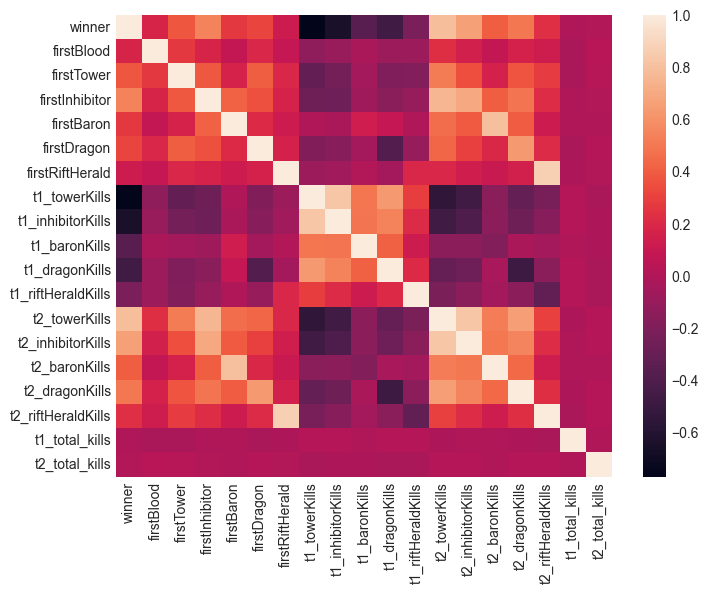

In [ ]:
#Creamos una nueva base de datos eliminando toda la información que no utilizaremos en el gráfico de correlación
corr_db = lol_db.drop(["t1_champ1_sum1","t1_champ1_sum2","t1_champ2_sum1","t1_champ2_sum2",
                       "t1_champ3_sum1","t1_champ3_sum2","t1_champ4_sum1","t1_champ4_sum2",
                       "t1_champ5_sum1","t1_champ5_sum2","t2_champ1_sum1","t2_champ1_sum2",
                       "t2_champ2_sum1","t2_champ2_sum2","t2_champ3_sum1","t2_champ3_sum2",
                       "t2_champ4_sum1","t2_champ4_sum2","t2_champ5_sum1","t2_champ5_sum2"],axis = 1)

corr_df = corr_db.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df)
plt.show()

Viendo este gráfico de correlaciones, pódemos ver de forma clara las variables que más se correlacionan, y dentro de esas se encuentran las que ya seleccionamos anteriormente.

### Gráfico de barras

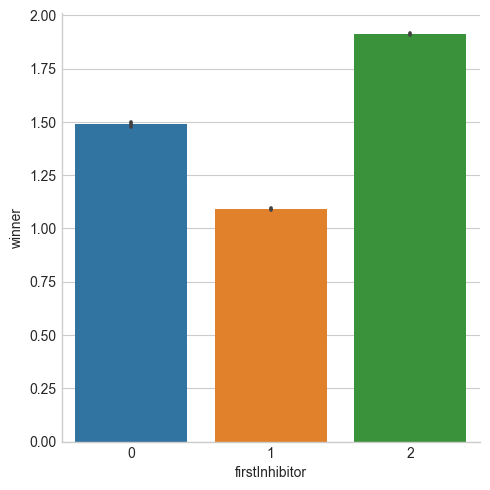

In [ ]:
g = sns.catplot(x = "firstInhibitor", y = "winner", data = lol_db, kind = "bar")

Podemos observar la influencia directa de firstInhibitor en la determinación del ganador.

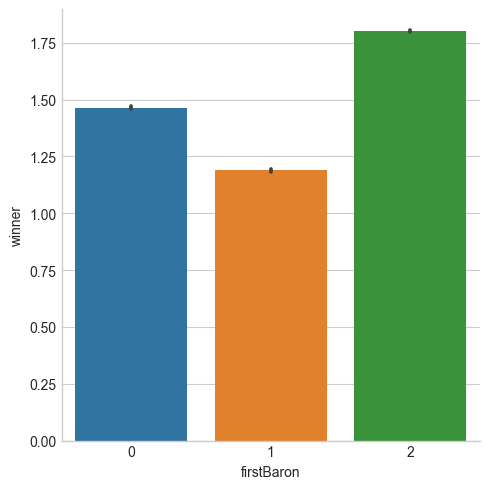

In [ ]:
g = sns.catplot(x = "firstBaron", y = "winner", data = lol_db, kind = "bar")

Los resultados son básicamente los mismos que con el firstInhibitor. Podríamos argumentar que, si un equipo
consigue el primer barón, ¡tiene más probabilidades de ganar la partida!

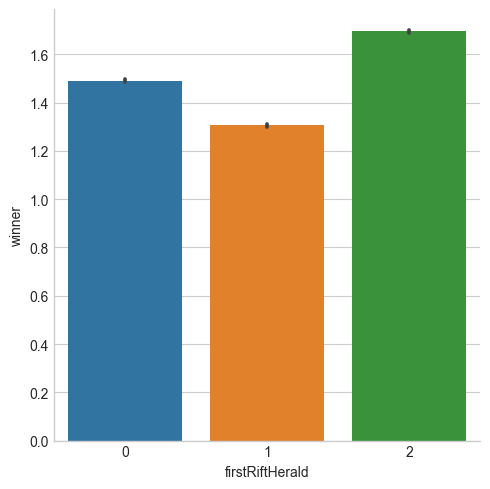

In [ ]:
g = sns.catplot(x = "firstRiftHerald", y = "winner", data = lol_db, kind = "bar")

Aunque la tasa es inferior a las anteriores, todavía se puede observar una relación directa entre el primer
riftherald y la posibilidad de ser ganador.

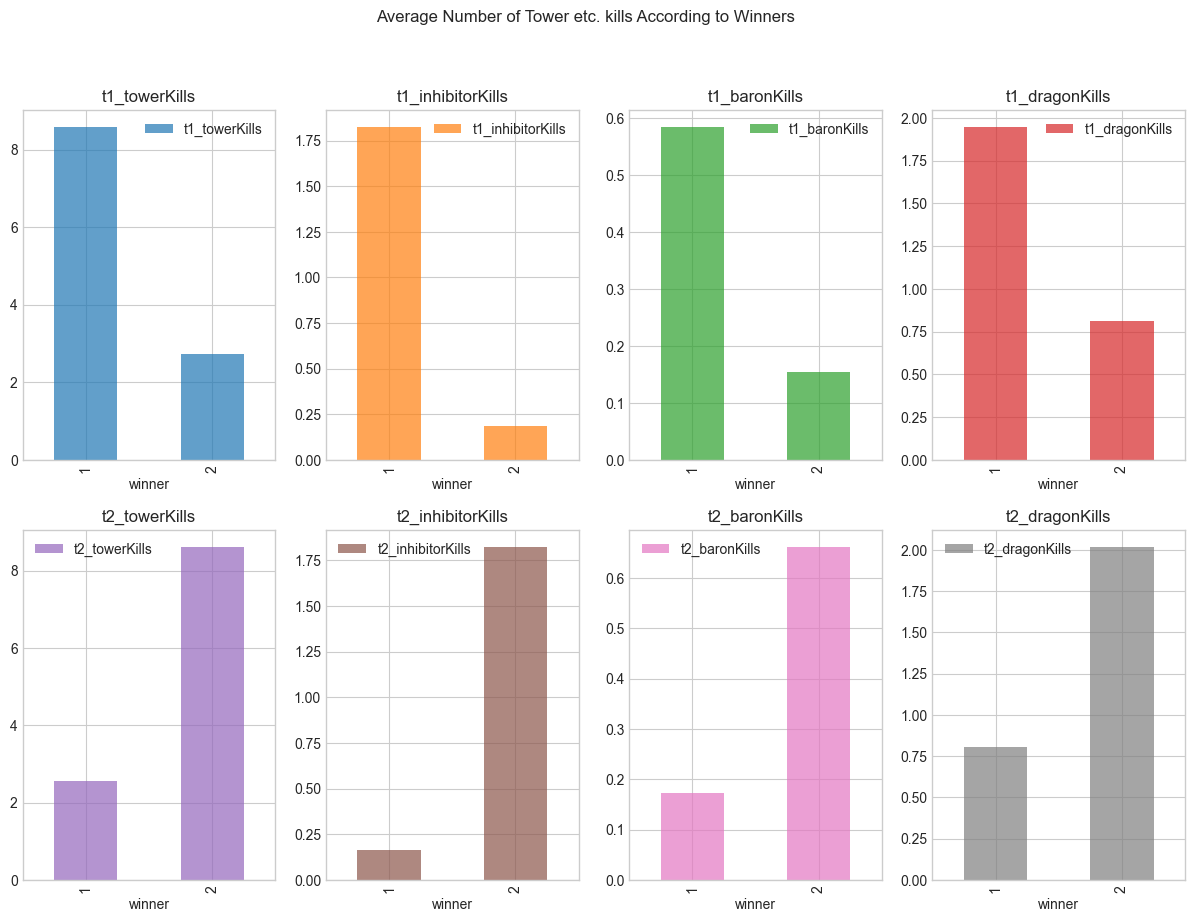

In [ ]:
data_new = lol_db[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
f=data_new.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

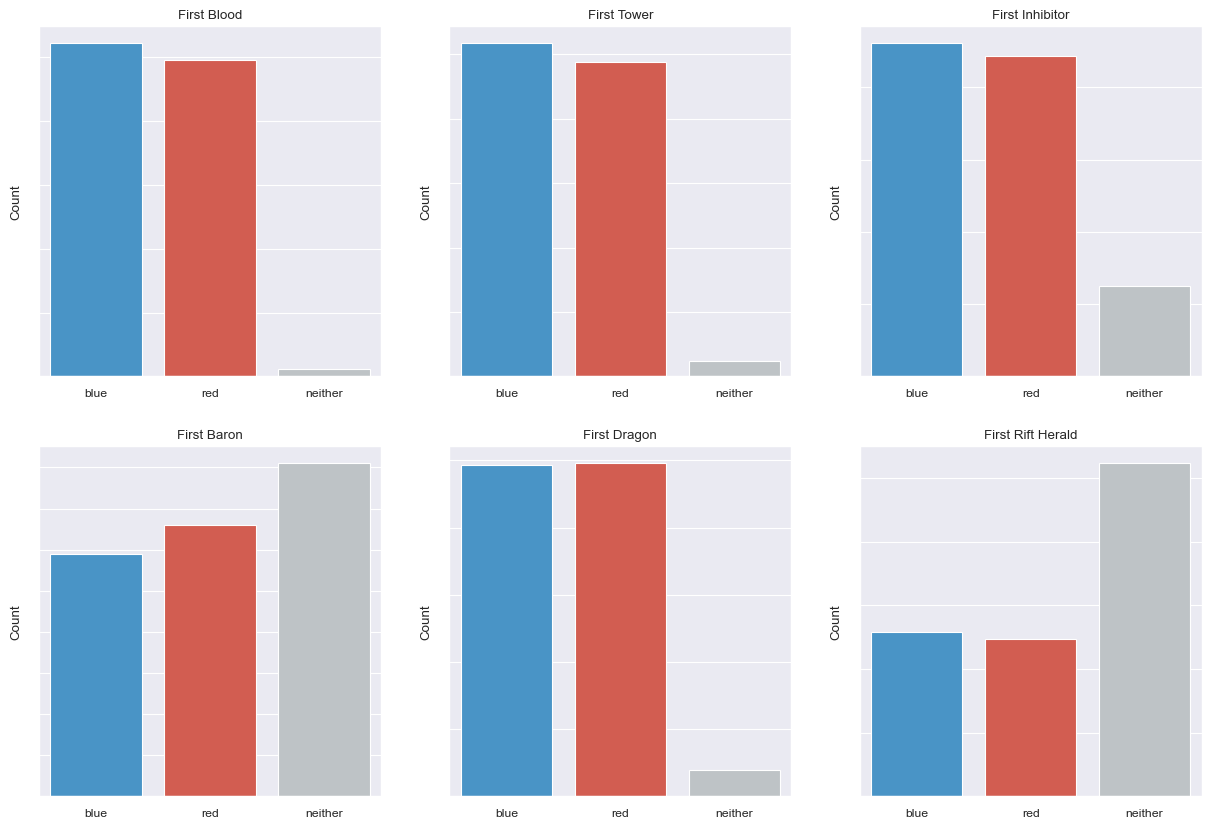

In [ ]:
dataClean = lol_db.replace([0,1,2],['neither','blue','red'])
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)

plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

### Gráfico de mapa calor

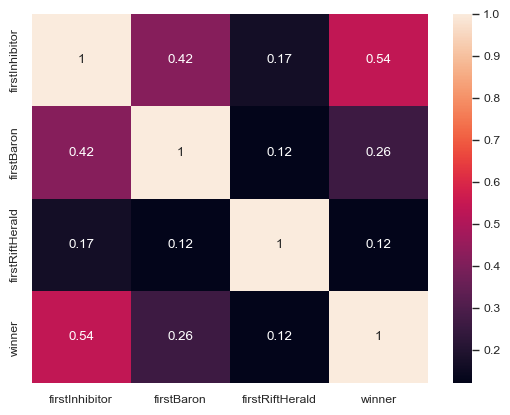

In [ ]:
sns.heatmap(lol_db[["firstInhibitor","firstBaron","firstRiftHerald","winner"]].corr(),annot = True)
plt.show()

### Gráfico de puntos

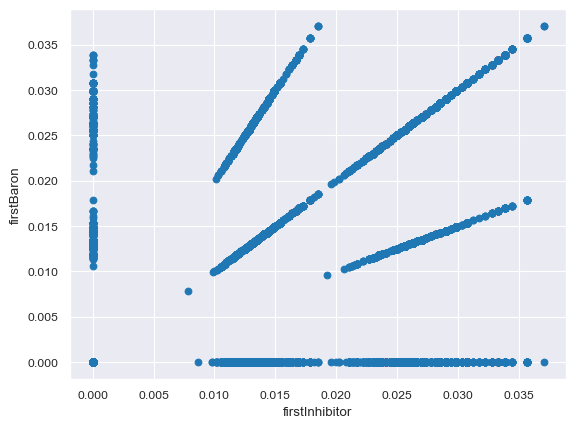

In [ ]:
x_data = lol_db.T.drop(["winner"],axis = 0)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x = x.T

plt.scatter(x['firstInhibitor'],x['firstBaron'])
plt.xlabel('firstInhibitor')
plt.ylabel('firstBaron')
plt.show()

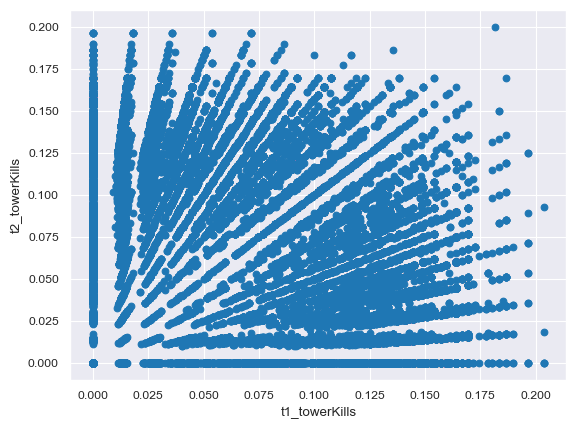

In [ ]:
plt.scatter(x['t1_towerKills'],x['t2_towerKills'])
plt.xlabel('t1_towerKills')
plt.ylabel('t2_towerKills')
plt.show()

<a id = "6"></a>
## Machine Learning

### Preparando la información que se utilizará

In [ ]:

#Obtenemos todo menos la variable a predecir y normalizamos
x_data = lol_db.T.drop(["winner"],axis = 0)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x = x.T

#Guardamos la variable a predecir
y = lol_db["winner"].values

# Dividimos el conjunto de datos en 4 conjuntos al azar, dos para entrenamiento y dos para pruebas
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1505)

<a id = "7"></a>
### Aprendizaje Supervisado

<a id = "8"></a>
#### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

lr_result = round((lr.score(x_test,y_test)*100),2)
print("Precision:",lr_result, "%")

Precision: 95.73 %


<font color = "green">
Mediante el uso del método de regresión logística, hemos predicho el ganador y la tasa de precisión es del 95.73% según la puntuación de LR.

<a id = "9"></a>
#### K-Nearest Neighbors (KNN)

In [ ]:
# Creamos un modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo con el conjunto de entrenamiento
knn.fit(x_train, y_train)

# Hacemos predicciones con el conjunto de prueba
y_pred = knn.predict(x_test)

# Calculamos la precisión
knn_result = round(accuracy_score(y_test, y_pred)*100,2)

print("Precisión :", knn_result, "%")

Precisión : 90.62 %


<font color = "green">
Aquí observamos un 90.62% de precisión para nuestro modelo KNN.

<a id = "10"></a>
#### Support Vector Machine (SVM)

In [ ]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

svm_result = round(svm.score(x_test,y_test)*100,2)

print("Precisión: ", svm_result, "%")

Precisión:  95.77 %


<font color = "green">
Con este metodo obtuvimos 95.77% de precision.

<a id = "11"></a>
#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

d_tree_result = round(dt.score(x_test,y_test)*100,2)

print("Precisión:",d_tree_result,"%")

Precisión: 95.65 %


<font color = "green">
Con este método obtuvimos 95.65 % de precisión

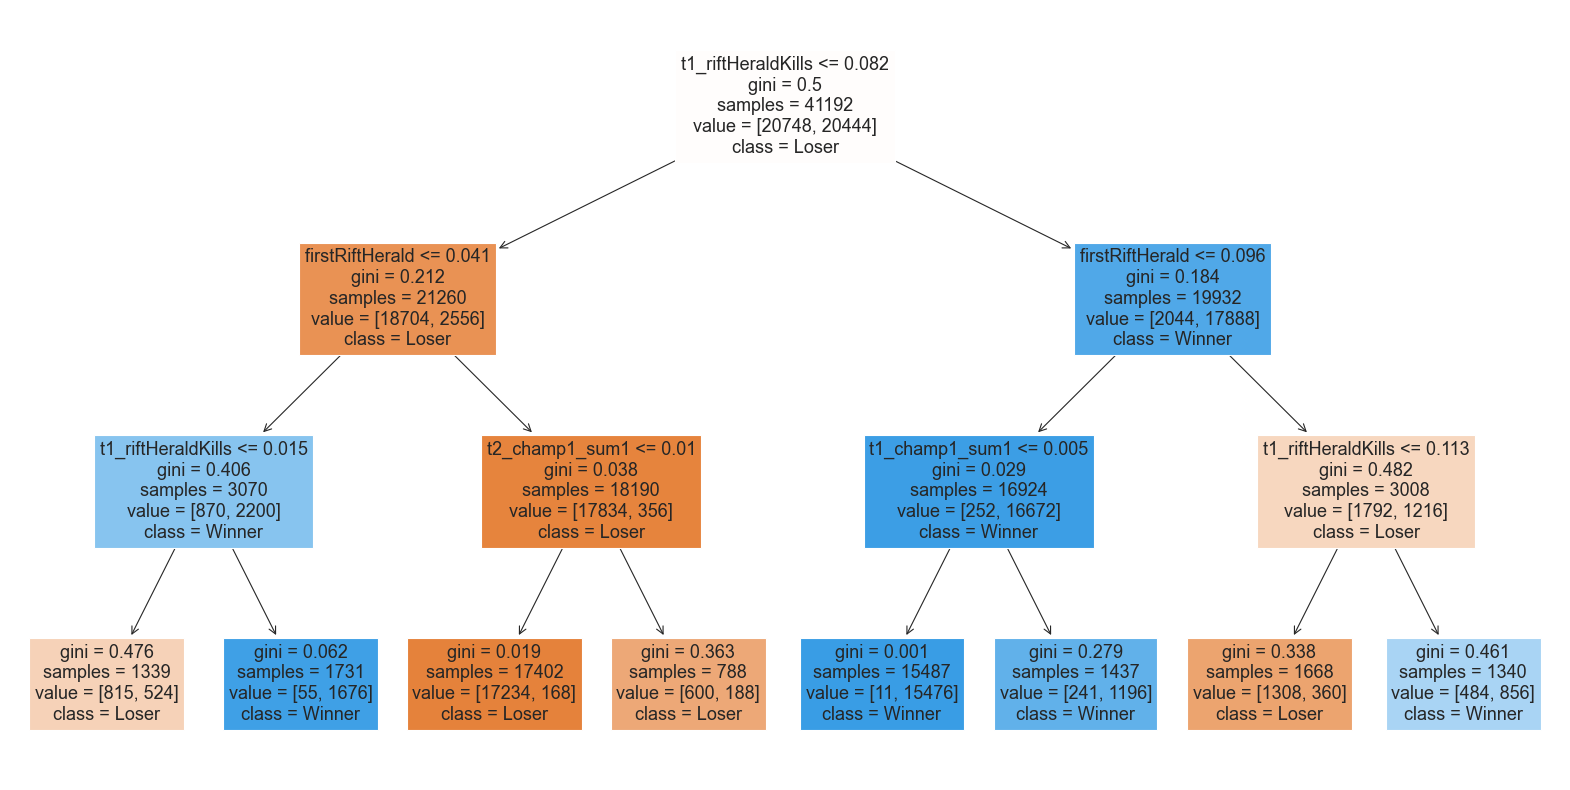

In [ ]:
x_tree = x_train.drop(['t1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2'],axis = 1)

dt2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt2 = dt2.fit(x_tree,y_train)
plt.subplots(figsize=(20,10))
plot_tree(dt2, fontsize=13, feature_names= lol_db.columns, class_names=['Loser', 'Winner'], filled=True)
plt.show()

<a id = "12"></a>
#### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

rf_result =  round(rf.score(x_test,y_test)*100,2)

print("Precisión:", rf_result, "%")

Precisión: 96.81 %


<font color = "green">
Con este metodo obtuvimos un 96.81% de precisión.

##### Veamos una matriz de confución

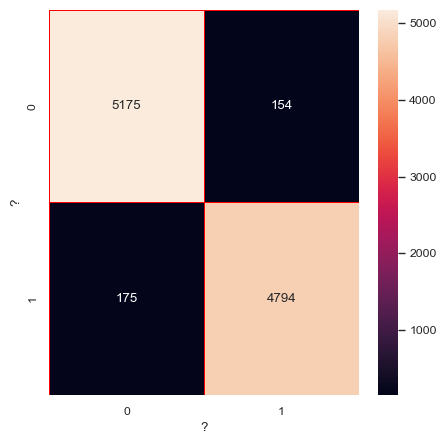

In [ ]:
y_pred = rf.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 0.5,linecolor = "red",fmt = ".0f",ax=ax)
plt.xlabel("?")
plt.ylabel("?")
plt.show()

Como se puede ver, hay un número muy bajo de fallos en comparación con los aciertos.

<a id = "13"></a>
## Aprendizaje Sin Supervisión

<a id = "14"></a>
### Kmeans Clustering

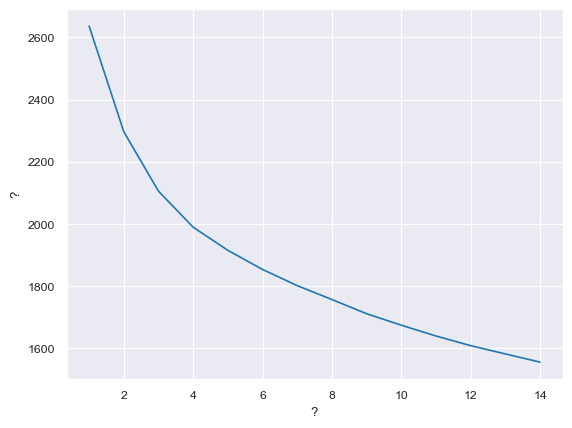

In [ ]:
km_db = x.drop(['t1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2'],axis = 1)

wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(km_db)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("?")
plt.ylabel("?")
plt.show()

### Veamos los clústers gráficamente

In [ ]:
#Reducimos el número de dimensiones a 4
pca = PCA(n_components=3)
pca_X = pca.fit_transform(km_db)

colors = np.array([x for x in 'bgrcmykbgr'])
#Ejecutando k-means con los resultados de pca
km_pca3 = KMeans(n_clusters=2).fit(pca_X)

fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1], z=pca_X[:,2],color=colors[km_pca3.labels_])
#fig.show(renderer='notebook')
fig.show()

### Dendrograma

Text(0, 0.5, 'Distance')

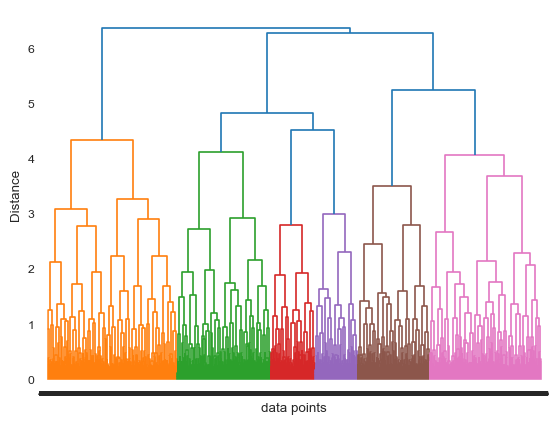

In [ ]:
merg = linkage(x_test.drop(['t1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',"t1_total_kills","t2_total_kills"],axis = 1),method = "ward")
dendrogram(merg,leaf_rotation = 0)
plt.xlabel("data points")
plt.ylabel("Distance")

<a id = "15"></a>
## Hierarchical Cluster

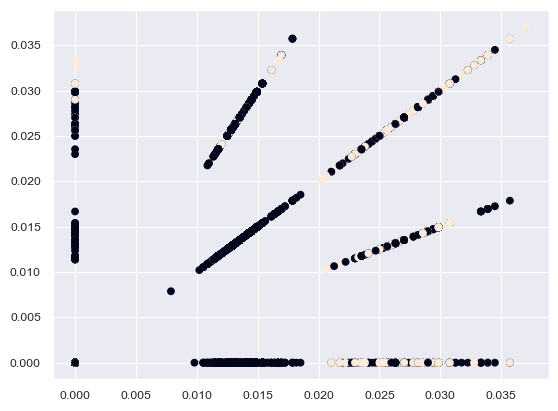

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2,affinity = "euclidean",linkage = "ward")
cluster = hierarchical_cluster.fit_predict(x_test.drop(['t1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',"t1_total_kills","t2_total_kills"],axis = 1))
x_test["label"] = cluster

# Seleccionamos dos características para graficar
x = x_test['firstInhibitor']
y = x_test['firstBaron']

# Asignamos colores a los puntos de datos según su cluster
colors = x_test['label']

# Creamos una figura y un eje de subgráfica
fig, ax = plt.subplots()

# Graficamos los puntos de datos con colores según su cluster
ax.scatter(x, y, c=colors)

# Mostramos la gráfica
plt.show()

<a id = "16"></a>
## Resumen de las predicciones

In [ ]:

table = PrettyTable()
table.field_names = ["Método", "Presición en %"]
table.add_row(["Logistic Regression", lr_result])
table.add_row(["K-Nearest Neighbors (KNN)", knn_result])
table.add_row(["Support Vector Machine (SVM)", svm_result])
table.add_row(["Decision Tree", d_tree_result])
table.add_row(["Random Forest", rf_result])
table.title = "Predicciones hechas en python"

print(table)

+-----------------------------------------------+
|         Predicciones hechas en python         |
+------------------------------+----------------+
|            Método            | Presición en % |
+------------------------------+----------------+
|     Logistic Regression      |     95.73      |
|  K-Nearest Neighbors (KNN)   |     90.62      |
| Support Vector Machine (SVM) |     95.77      |
|        Decision Tree         |     95.65      |
|        Random Forest         |     96.81      |
+------------------------------+----------------+


<a id = "17"></a>
## Web Scrapping   

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
r = requests.get('https://es.wikipedia.org/wiki/Jason_Statham')

In [ ]:
print(r)

<Response [200]>


In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Jason Statham - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=docume

In [ ]:
#Para obtener el título
print(soup.title)

<title>Jason Statham - Wikipedia, la enciclopedia libre</title>


In [ ]:
#Para obtener el nombre de la etiqueta
print(soup.title.name)

title


In [ ]:
#Para obtener el nombre del padre de la etiqueta
print(soup.title.parent.name)

head


In [ ]:
for linea in soup.find_all('span'):
    linea.extract()

for linea in soup.find_all('sup'):
    linea.extract()

s = soup.find('div', id="bodyContent")


content = s.find_all('p')




In [ ]:
content

[<p><b>Jason Statham</b> (<a href="/wiki/Shirebrook" title="Shirebrook">Shirebrook</a>, <a href="/wiki/Derbyshire" title="Derbyshire">Derbyshire</a>, <a href="/wiki/Inglaterra" title="Inglaterra">Inglaterra</a>; 26 de julio de 1967​es un <a href="/wiki/Actor" title="Actor">actor</a> de <a href="/wiki/Cine" title="Cine">cine</a>, <a class="mw-redirect" href="/wiki/Artista_marcial" title="Artista marcial">artista marcial</a>, <a href="/wiki/Modelo_(moda)" title="Modelo (moda)">modelo</a> y <a href="/wiki/Salto_(nataci%C3%B3n)" title="Salto (natación)">exclavadista</a> <a href="/wiki/Reino_Unido" title="Reino Unido">británico</a>, famoso por sus papeles en <a href="/wiki/Cine" title="Cine">películas</a> de acción y aventura.
 </p>,
 <p>Dentro de sus participaciones figuran <i><a href="/wiki/Lock,_Stock_and_Two_Smoking_Barrels" title="Lock, Stock and Two Smoking Barrels">Lock and Stock</a></i> (1998), <i><a href="/wiki/Snatch" title="Snatch">Snatch</a></i> (2000), <i><a class="mw-redirect"

In [ ]:
#Para sacar el texto
for line in content:
    print(line.text)

Jason Statham (Shirebrook, Derbyshire, Inglaterra; 26 de julio de 1967​es un actor de cine, artista marcial, modelo y exclavadista británico, famoso por sus papeles en películas de acción y aventura.

Dentro de sus participaciones figuran Lock and Stock (1998), Snatch (2000), Revólver (2005), La carrera de la muerte (2008) y Blitz (2011), así como por interpretar a Chev Chelios en la película Crank (2006) y su secuela Crank: High Voltage (2009), a Arthur Bishop en las películas The Mechanic (2011) y su secuela Mechanic: Resurrection (2016), por protagonizar la trilogía de Transporter como Frank Martin, a Lee Christmas en la serie películas de The Expendables y a Deckard Shaw en la serie de películas de Fast & Furious. 

Jason Statham se ha hecho un hueco en el cine de acción gracias a su aspecto de tipo duro. Por lo general realiza sus propias escenas de acción sin dobles​ y está encasillado en personajes de antihéroe.​

Jason Statham nació el 26 de julio de 1967 en Shirebrook, Derbysh

In [ ]:
#Para sacar los links
for link in soup.find_all('a'):
    print(link.get('href'))

None
#mw-head
#searchInput
/wiki/Archivo:Jason_Statham_2018.jpg
/wiki/Derbyshire
/wiki/Inglaterra
/wiki/Reino_Unido
/wiki/Londres
/wiki/Reino_Unido
/wiki/Kelly_Brook
/wiki/Rosie_Huntington-Whiteley
/wiki/Actor
/wiki/Artes_marciales
/wiki/Modelo_(moda)
/wiki/Salto_(nataci%C3%B3n)
/wiki/G%C3%A9nero_de_acci%C3%B3n
/wiki/Salto_(nataci%C3%B3n)
/wiki/Manchester_United_Football_Club
https://www.wikidata.org/wiki/Q169963
/wiki/Shirebrook
/wiki/Derbyshire
/wiki/Inglaterra
/wiki/Actor
/wiki/Cine
/wiki/Artista_marcial
/wiki/Modelo_(moda)
/wiki/Salto_(nataci%C3%B3n)
/wiki/Reino_Unido
/wiki/Cine
/wiki/Lock,_Stock_and_Two_Smoking_Barrels
/wiki/Snatch
/wiki/Rev%C3%B3lver_(pel%C3%ADcula_de_2005)
/wiki/Death_Race
/wiki/Blitz_(pel%C3%ADcula)
/wiki/Crank_(pel%C3%ADcula)
/wiki/Crank:_High_Voltage
/wiki/The_Mechanic
/wiki/Mechanic:_Resurrection
/wiki/The_Transporter
/wiki/The_Expendables
/wiki/Fast_%26_Furious
/wiki/Encasillamiento
#Biografía
#Inicios
#Vida_personal
#Trayectoria_profesional
#Filmografía_co

In [ ]:
texto=""
for line in content:
    texto+=line.text

texto

'Jason Statham (Shirebrook, Derbyshire, Inglaterra; 26 de julio de 1967\u200bes un actor de cine, artista marcial, modelo y exclavadista británico, famoso por sus papeles en películas de acción y aventura.\nDentro de sus participaciones figuran Lock and Stock (1998), Snatch (2000), Revólver (2005), La carrera de la muerte (2008) y Blitz (2011), así como por interpretar a Chev Chelios en la película Crank (2006) y su secuela Crank: High Voltage (2009), a Arthur Bishop en las películas The Mechanic (2011) y su secuela Mechanic: Resurrection (2016), por protagonizar la trilogía de Transporter como Frank Martin, a Lee Christmas en la serie películas de The Expendables y a Deckard Shaw en la serie de películas de Fast & Furious. \nJason Statham se ha hecho un hueco en el cine de acción gracias a su aspecto de tipo duro. Por lo general realiza sus propias escenas de acción sin dobles\u200b y está encasillado en personajes de antihéroe.\u200b\nJason Statham nació el 26 de julio de 1967 en Shi

In [ ]:
print(texto.count('película'))

15


Ejercicio 3 - Web and text mining

Extrae el texto de una pagina web a tu elecciony cuenta cuantes veces aparece una palabra que consideres relevante dentro de la tematica de la pagina que escogiste

In [ ]:
pagina = requests.get('https://streamsets.com/blog/what-is-streaming-analytics/')
sopa = BeautifulSoup(pagina.content, 'html.parser')

contenido = sopa.find('div', {"class": "vcex-post-content-c"})

contenido
textoInteresante = ""

for line in contenido:
    textoInteresante+=line.text

print(f"Veces que se repite la palabra 'Streaming': {textoInteresante.count('streaming')}")
print(f"Veces que se repite la palabra 'Data': {textoInteresante.count('data')}")


Veces que se repite la palabra 'Streaming': 30
Veces que se repite la palabra 'Data': 45
